# NASA Asteroid Data

Version 1: Updated April 3, 2021.

- [Daniel, Castro]
- [April 5, 2021]

## Loading and Info

- Importing packages like pandas and numpy for handling the data frame.
- Detailing the provided data dictionary and initial thoughts.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import os
os.getcwd()
from google.colab import files
files.upload()

'/content'

Saving nasa.csv to nasa.csv


{'nasa.csv': b'Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous\r\n3703080,3703080,21.6,0.1272198785,0.2844722965,127.2198785394,284.4722965033,0.0790507431,0.1767628354,417.3880663071,933.3080892598,1995-01-01,788947200000,6.1158343887,22017.003799315,13680.5099440799,0.4194825299,163.1787109375,62753692,38993336,Earth,17

In [ ]:
import io
df = pd.read_csv("/content/nasa.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Neo Reference ID     Name  ...  Equinox  Hazardous
0           3703080  3703080  ...    J2000       True
1           3723955  3723955  ...    J2000      False
2           2446862  2446862  ...    J2000       True
3           3092506  3092506  ...    J2000      False
4           3514799  3514799  ...    J2000       True

[5 rows x 40 columns]

In [ ]:
df.describe()

Neo Reference ID          Name  ...  Mean Anomaly  Mean Motion
count      4.687000e+03  4.687000e+03  ...   4687.000000  4687.000000
mean       3.272298e+06  3.272298e+06  ...    181.167927     0.738242
std        5.486011e+05  5.486011e+05  ...    107.501623     0.342627
min        2.000433e+06  2.000433e+06  ...      0.003191     0.086285
25%        3.097594e+06  3.097594e+06  ...     87.006918     0.453289
50%        3.514799e+06  3.514799e+06  ...    185.718889     0.712946
75%        3.690060e+06  3.690060e+06  ...    276.531946     0.984669
max        3.781897e+06  3.781897e+06  ...    359.917991     2.039000

[8 rows x 35 columns]

In [ ]:
#Checking to see if there are any missing values. If there were, we could explore imputation.
df.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

# Provided Data Dictionary

A partial selection of the features with descriptions.  Note that the problem can be solved without having a detailed understanding of the features, but these might help with feature processing.

 ‘**Neo Reference ID**’: This feature denotes the reference ID assigned to an asteroid.

 ‘**Name**’: This feature denotes the name given to an asteroid.

 ‘**Absolute Magnitude**’: This feature denotes the absolute magnitude of an asteroid. An asteroid’s absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (AU) away, and 1 AU from the Sun and at a zero phase angle.

 ‘**Est Dia in KM(min)**’: This feature denotes the estimated diameter of the asteroid in kilometres (KM).

 ‘**Est Dia in M(min)**’: This feature denotes the estimated diameter of the asteroid in meters(M).

 ‘**Relative Velocity km per sec**’: This feature denotes the relative velocity of the asteroid in kilometre per second.

 ‘**Relative Velocity km per hr**’: This feature denotes the relative velocity of the asteroid in kilometre per hour.

 ‘**Orbiting Body**’: This feature denotes the planet around which the asteroid is revolving.

 ‘**Jupiter Tisserand Invariant**’: This feature denotes the Tisserand’s parameter for the asteroid. Tisserand’s parameter (or Tisserand’s invariant) is a value calculated from several orbital elements(semi-major axis, orbital eccentricity, and inclination) of a relatively small object and a more substantial‘ perturbing body’. It is used to distinguish different kinds of orbits.

 ‘**Eccentricity**’: This feature denotes the value of eccentricity of the asteroid’s orbit. Just like many other bodies in the solar system, the realms made by asteroids are not perfect circles, but ellipses. The axis marked eccentricity is a measure of how far from circular each orbit is: the smaller the eccentricity number, the more circular the realm.

 ‘**Semi Major Axis**’: This feature denotes the value of the Semi Major Axis of the asteroid’s orbit. As discussed above, the realm of an asteroid is elliptical rather than circular. Hence, the Semi Major Axis exists.

 ‘**Orbital Period**’: This feature denotes the value of the orbital period of the asteroid. Orbital period refers to the time taken by the asteroid to make one full revolution around its orbiting body.

 ‘**Perihelion Distance**’: This feature denotes the value of the Perihelion distance of the asteroid. For a body orbiting the Sun, the point of least distance is the perihelion.

 ‘**Aphelion Dist**’: This feature denotes the value of Aphelion distance of the asteroid. For a body orbiting the Sun, the point of greatest distance is the aphelion.

 ‘**Hazardous**’: This feature denotes whether the asteroid is hazardous or not.
#############################################

#Subject matter understanding:
- An asteroid likely eliminated the dinosaurs (Chicxulub crater) so understanding if it is hazardous is important.
- Asteroids vary in size from 'minor planets' to 'planetoids'. The larger the asteroids, the more dangerous it is.
- The closer or faster the asteroids comes to hitting earth, the more dangerous it is.
- Many asteroids orbit Mars and Jupiter (possibly suggesting that most come from the same location/source). 

#Initial thoughts:

- Classification models used to predict target variable: Hazardous
- Ignore/delete Neo Reference ID, Name (identical field), Orbit ID
- Lack of variation: Orbiting Body, Equinox
- Various numeric values that need to be normalized
- Estimated diameter (Est Dia) fields detail the same value but in converted to different units. Makes sense to pick a unit to keep and remove the other duplicative fields. Since Relative Velocity is provided in KM, I'll keep the features that are provided in KM.
- Same thing occuring with Relative Velocity and Miss Dist
- Huge opportunity to create feature interactions but will need feature selection applied to decrease the feature space.
- Extract Close Approach Date, Orbit Determination Date features (month, year, etc.) however, asteroids aren't governed by any meaningful schedule. In this case, I'll delete the date features instead of breaking it up into various features.
- Adjust data types, eg. numeric to category: Orbit Uncertainty
- Check for class imbalance.
- When considering performance metrics, a false positive would indicate an asteroid predicted as hazardous when it isn't. A false negative would indicate an asteroid predicted as non-hazardous when it is. Therefore, priority should be given to performance metrics that minimize false negatives (eg. Recall, F1 Score). 


##EDA & Preprocessing

In the following section, I will apply exploratory data analysis and preprocessing to clean up the data and understand existing relationships.

In [ ]:
#Quick review of the target feature to assess whether data imbalance is present.
np.bincount(df['Hazardous'])
df.groupby('Hazardous').agg(['count'])

array([3932,  755])

Neo Reference ID  Name  ... Mean Motion Equinox
                     count count  ...       count   count
Hazardous                         ...                    
False                 3932  3932  ...        3932    3932
True                   755   755  ...         755     755

[2 rows x 39 columns]

In [ ]:
#There appears to be some imbalance but not enough to warrant using SMOTE.
print("True values constitute approximately "+str(755/(3932+755)*100)+" percent of the total population.")

True values constitute approximately 16.108384894388735 percent of the total population.


In [ ]:
#Adjusting data types
df['Orbit Uncertainity'] = df['Orbit Uncertainity'].astype('category')

In [ ]:
#Confirming low variance
df.groupby('Orbiting Body').agg(['count'])
df.groupby('Equinox').agg(['count'])

Neo Reference ID  Name  ... Equinox Hazardous
                         count count  ...   count     count
Orbiting Body                         ...                  
Earth                     4687  4687  ...    4687      4687

[1 rows x 39 columns]

Neo Reference ID  Name  ... Mean Motion Hazardous
                   count count  ...       count     count
Equinox                         ...                      
J2000               4687  4687  ...        4687      4687

[1 rows x 39 columns]

In [ ]:
#Remove columns that have target leakage or that add no value due to low/high variance
remove_cols = [
            # Target Leakage - please note that I was unable to determine if any fields introduced target leakage
    
            # Don't want these (won't be helpful, I don't think.)
            #Low variance & low/zero predictability
            'Orbiting Body', 'Equinox',
            #High variance & low predictability
            'Name', 'Orbit ID', 'Close Approach Date', 'Orbit Determination Date', 
            #Duplicative fields in difference converted units
            'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
            'Relative Velocity km per sec', 'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)'
            #, 'Neo Reference ID' - I will keep the reference ID for now as it could help identify specific data points during EDA/testing but ensure it is ignored or dropped for modelling.
          ] 

df = df.drop(remove_cols, axis=1)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Neo Reference ID             4687 non-null   int64   
 1   Absolute Magnitude           4687 non-null   float64 
 2   Est Dia in KM(min)           4687 non-null   float64 
 3   Est Dia in KM(max)           4687 non-null   float64 
 4   Epoch Date Close Approach    4687 non-null   int64   
 5   Relative Velocity km per hr  4687 non-null   float64 
 6   Miss Dist.(kilometers)       4687 non-null   float64 
 7   Orbit Uncertainity           4687 non-null   category
 8   Minimum Orbit Intersection   4687 non-null   float64 
 9   Jupiter Tisserand Invariant  4687 non-null   float64 
 10  Epoch Osculation             4687 non-null   float64 
 11  Eccentricity                 4687 non-null   float64 
 12  Semi Major Axis              4687 non-null   float64 
 13  Inc

Neo Reference ID  Absolute Magnitude  ...  Mean Motion  Hazardous
0           3703080                21.6  ...     0.590551       True
1           3723955                21.3  ...     0.845330      False
2           2446862                20.3  ...     0.559371       True
3           3092506                27.4  ...     0.700277      False
4           3514799                21.6  ...     0.726395       True

[5 rows x 23 columns]

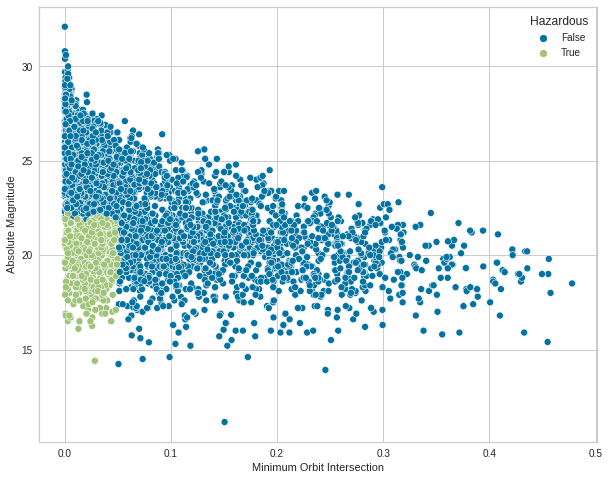

In [ ]:
#EDA to understand some important features and explore if dummy variables could be created. 
#Please note that I start with doing some general EDA and then iterate back over the EDA after some feature importance is found with PyCaret (later on).
sns.scatterplot(x=df['Minimum Orbit Intersection'],y=df['Absolute Magnitude'], hue=df['Hazardous'])

In [ ]:
#I want to target the subsection that is appearing in the plot above.
df[(df['Minimum Orbit Intersection'] < 0.05) & (df['Absolute Magnitude'] < 22.2)].head(10)

Neo Reference ID  Absolute Magnitude  ...  Mean Motion  Hazardous
0            3703080                21.6  ...     0.590551       True
2            2446862                20.3  ...     0.559371       True
4            3514799                21.6  ...     0.726395       True
9            2306383                21.5  ...     1.201862       True
22           3005973                21.7  ...     1.141522       True
25           3646046                21.3  ...     0.765033       True
27           2162173                19.3  ...     0.759669       True
35           2267221                19.8  ...     0.930544       True
38           2419472                19.9  ...     0.726894       True
47           3409964                20.8  ...     0.913338       True

[10 rows x 23 columns]

In [ ]:
#There appears to be value between these two features.
df[(df['Minimum Orbit Intersection'] < 0.05) & (df['Absolute Magnitude'] < 22.2) ].groupby('Hazardous').agg(['count'])

Neo Reference ID Absolute Magnitude  ... Mean Anomaly Mean Motion
                     count              count  ...        count       count
Hazardous                                      ...                         
False                   18                 18  ...           18          18
True                   749                749  ...          749         749

[2 rows x 22 columns]

In [ ]:
#These Minimum Orbit Intersection and Absolute Magnitude appear to be useful together - dummy variable created.
df['dummy_MinOrbitIntersection_AbsMag'] = np.where((df['Minimum Orbit Intersection'] < 0.05) & (df['Absolute Magnitude'] < 22.2), 1, 0)

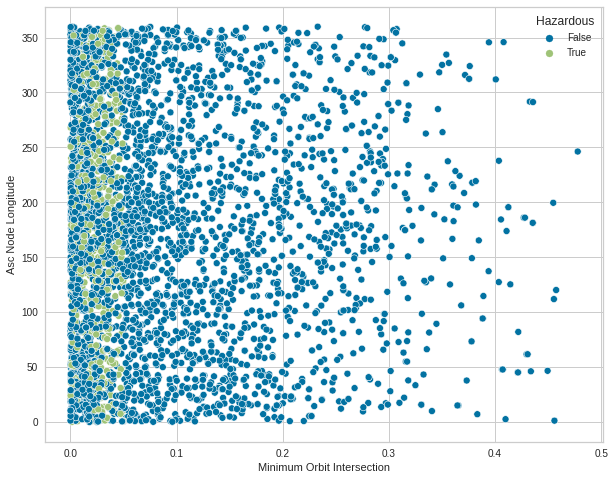

In [ ]:
#While there is a skew based on Minimum Orbit Intersection, it doesn't appear like Acs Node Longitude is too helpful.
sns.scatterplot(x=df['Minimum Orbit Intersection'],y=df['Asc Node Longitude'], hue=df['Hazardous'])

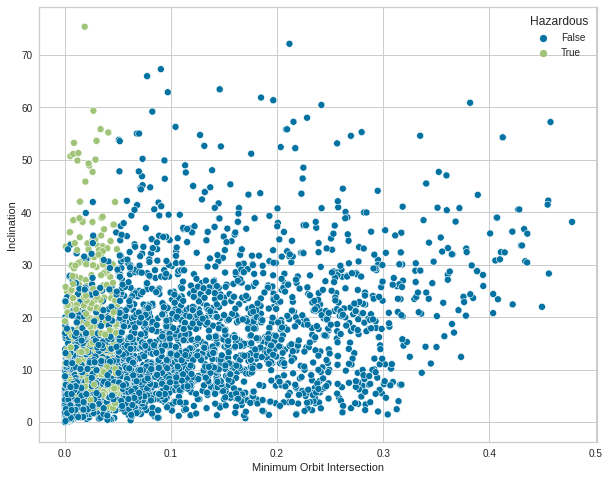

In [ ]:
#These two features appear to target a better subset of the target variable.
sns.scatterplot(x=df['Minimum Orbit Intersection'],y=df['Inclination'], hue=df['Hazardous'])

In [ ]:
df[(df['Minimum Orbit Intersection'] < 0.05) & (df['Inclination'] > 20)].head(10)

Neo Reference ID  ...  dummy_MinOrbitIntersection_AbsMag
10           3444370  ...                                  0
25           3646046  ...                                  1
38           2419472  ...                                  1
52           3394543  ...                                  1
67           3127399  ...                                  0
68           3397922  ...                                  1
71           2484402  ...                                  1
77           2308242  ...                                  1
85           2458418  ...                                  1
93           2348314  ...                                  1

[10 rows x 24 columns]

In [ ]:
df[(df['Minimum Orbit Intersection'] < 0.05) & (df['Inclination'] > 20) ].groupby('Hazardous').agg(['count'])

Neo Reference ID  ... dummy_MinOrbitIntersection_AbsMag
                     count  ...                             count
Hazardous                   ...                                  
False                   90  ...                                90
True                   196  ...                               196

[2 rows x 23 columns]

In [ ]:
#Created an additional dummy variable based on the above EDA
df['dummy_MinOrbitIntersection_Inclin'] = np.where((df['Minimum Orbit Intersection'] < 0.05) & (df['Inclination'] > 20), 1, 0)

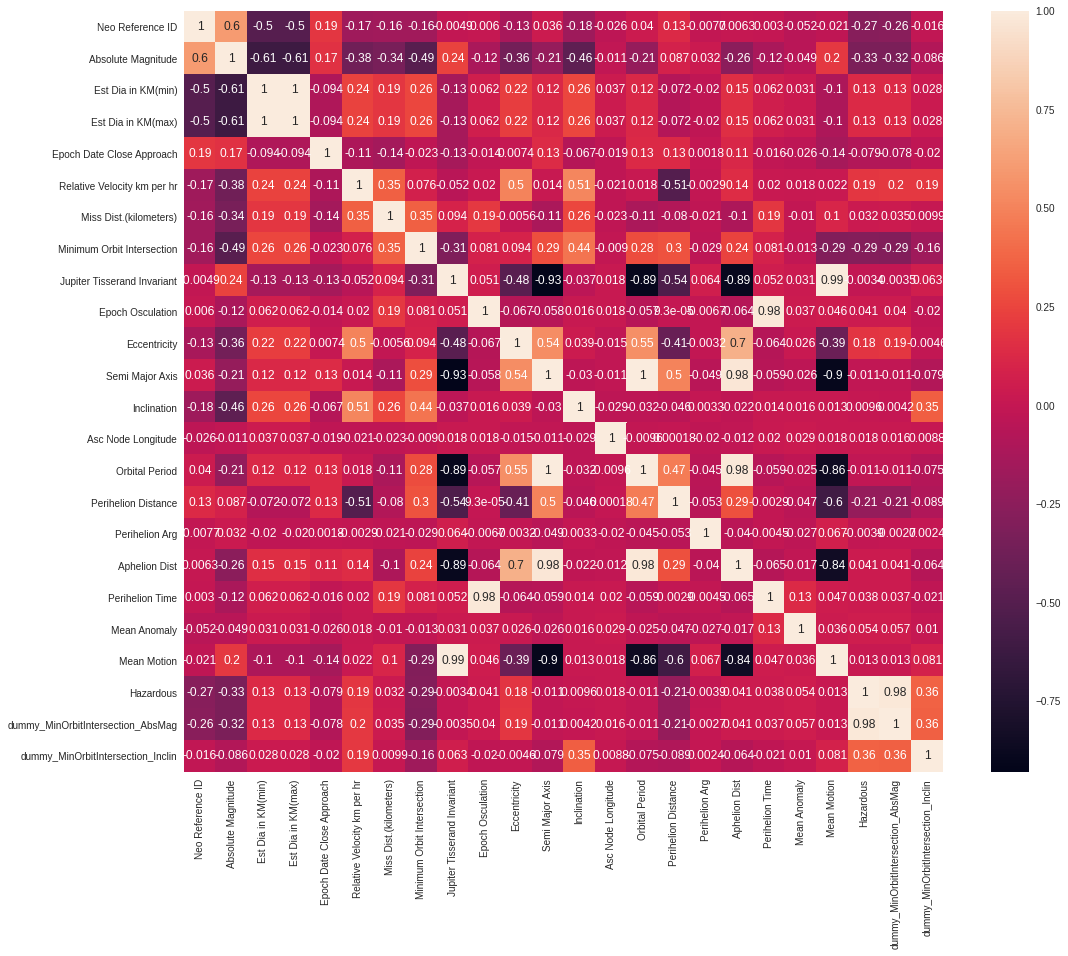

In [ ]:
#Adjust figure size for large feature space
rcParams['figure.figsize'] = 17,14
sns.heatmap(df.corr(),annot=True)

Please note that the two new dummy variables appear to have the highest correlation with the target variable. Therefore, this effort of feature engineering appears to be helpful.

#PyCaret Exploration

PyCaret is an open source low-code machine learning library that makes it extremely easy to test out popular algorithms to see which are the best.
PyCaret will also handle one hot encoding, train and test splits, hyperparameter tuning, cross validation, and more.

Please note that after determining the best model via PyCaret. I later redo the work with sci-kit learn to demonstrate my understanding of these techniques.

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 6.0MB/s 
     |████████████████████████████████| 245kB 8.2MB/s 
     |████████████████████████████████| 102kB 4.8MB/s 
     |████████████████████████████████| 2.0MB 9.6MB/s 
     |████████████████████████████████| 1.7MB 32.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 215kB 36.0MB/s 
     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 6.8MB 34.9MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 276kB 39.4MB/s 
     |████████████████████████████████| 14.2MB 256kB/s 
     |████████████████████████████████| 1.1MB 31.9MB/s 
     |████████████████████████████████| 3.2MB 30.9MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 81kB 6.3MB/s 
   

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
df.head()

Neo Reference ID  Absolute Magnitude  ...  Mean Motion  Hazardous
0           3703080                21.6  ...     0.590551       True
1           3723955                21.3  ...     0.845330      False
2           2446862                20.3  ...     0.559371       True
3           3092506                27.4  ...     0.700277      False
4           3514799                21.6  ...     0.726395       True

[5 rows x 23 columns]

In [ ]:
#PyCaret requires some initial set up. Some defaults were used such as a 70% dataset size for training.
from pycaret.classification import *
clustereg = setup(df, target='Hazardous', normalize=True, feature_selection=True, ignore_low_variance=True, remove_multicollinearity=True, 
                  group_features=[['Est Dia in KM(min)',	'Est Dia in KM(max)'],['Perihelion Distance',	'Perihelion Arg'],['Aphelion Dist',	'Perihelion Time'],['Mean Anomaly',	'Mean Motion']],
                  categorical_features=['Orbit Uncertainity'], ignore_features=['Neo Reference ID'], session_id=42)

Description              Value
0                               session_id                 42
1                                   Target          Hazardous
2                              Target Type             Binary
3                            Label Encoded  False: 0, True: 1
4                            Original Data         (4687, 25)
5                           Missing Values              False
6                         Numeric Features                 20
7                     Categorical Features                  3
8                         Ordinal Features              False
9                High Cardinality Features              False
10                 High Cardinality Method               None
11                   Transformed Train Set         (3280, 25)
12                    Transformed Test Set         (1407, 25)
13                      Shuffle Train-Test               True
14                     Stratify Train-Test              False
15                          Fold Generator    StratifiedKFold
16                             Fold Number                 10
17                                CPU Jobs                 -1
18                                 Use GPU              False
19                          Log Experiment              False
20                         Experiment Name   clf-default-name
21                                     USI               58a7
22                         Imputation Type             simple
23          Iterative Imputation Iteration               None
24                         Numeric Imputer               mean
25      Iterative Imputation Numeric Model               None
26                     Categorical Imputer           constant
27  Iterative Imputation Categorical Model               None
28           Unknown Categoricals Handling     least_frequent
29                               Normalize               True
30                        Normalize Method             zscore
31                          Transformation              False
32                   Transformation Method               None
33                                     PCA              False
34                              PCA Method               None
35                          PCA Components               None
36                     Ignore Low Variance               True
37                     Combine Rare Levels              False
38                    Rare Level Threshold               None
39                         Numeric Binning              False
40                         Remove Outliers              False
41                      Outliers Threshold               None
42                Remove Multicollinearity               True
43             Multicollinearity Threshold                0.9
44                              Clustering              False
45                    Clustering Iteration               None
46                     Polynomial Features              False
47                       Polynomial Degree               None
48                    Trignometry Features              False
49                    Polynomial Threshold               None
50                          Group Features               True
51                       Feature Selection               True
52                Feature Selection Method            classic
53            Features Selection Threshold                0.8
54                     Feature Interaction              False
55                           Feature Ratio              False
56                   Interaction Threshold               None
57                           Fix Imbalance              False
58                    Fix Imbalance Method              SMOTE

In [ ]:
#As mentioned previously, I want to use Recall so that I'm minimizing false negatives (predicting an asteroid isn't hazardous when it is).
genmodels = compare_models(sort='Recall')

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.9954  0.9985  0.9927  0.9802   
ridge                    Ridge Classifier    0.9954  0.0000  0.9927  0.9802   
lda          Linear Discriminant Analysis    0.9954  0.9962  0.9927  0.9802   
et                 Extra Trees Classifier    0.9963  0.9991  0.9927  0.9855   
rf               Random Forest Classifier    0.9960  0.9995  0.9908  0.9855   
nb                            Naive Bayes    0.9948  0.9941  0.9890  0.9801   
lightgbm  Light Gradient Boosting Machine    0.9954  0.9981  0.9890  0.9835   
dt               Decision Tree Classifier    0.9960  0.9917  0.9853  0.9907   
ada                  Ada Boost Classifier    0.9957  0.9996  0.9853  0.9890   
gbc          Gradient Boosting Classifier    0.9966  0.9972  0.9853  0.9944   
svm                   SVM - Linear Kernel    0.9079  0.0000  0.7578  0.8086   
qda       Quadratic Discriminant Analysis    0.5427  0.5563  0.5849  0.2105   
knn                K Neighbors Classifier    0.8137  0.6512  0.1566  0.3547   

              F1   Kappa     MCC  TT (Sec)  
lr        0.9863  0.9835  0.9836     0.658  
ridge     0.9863  0.9835  0.9836     0.028  
lda       0.9863  0.9835  0.9836     0.032  
et        0.9890  0.9868  0.9869     0.526  
rf        0.9881  0.9857  0.9858     0.691  
nb        0.9844  0.9813  0.9814     0.027  
lightgbm  0.9862  0.9834  0.9835     0.252  
dt        0.9879  0.9855  0.9856     0.035  
ada       0.9870  0.9844  0.9845     0.367  
gbc       0.9897  0.9877  0.9878     1.045  
svm       0.7135  0.6683  0.7053     0.041  
qda       0.2745  0.0671  0.1065     0.031  
knn       0.2162  0.1287  0.1429     0.132

In [ ]:
#The best model appears to be logistic regression. I'll create the specific model for tuning. 
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9939  0.9969  1.0000  0.9643  0.9818  0.9782  0.9784
1       0.9970  0.9999  1.0000  0.9818  0.9908  0.9890  0.9891
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9909  0.9978  1.0000  0.9474  0.9730  0.9675  0.9680
4       0.9970  0.9989  1.0000  0.9818  0.9908  0.9890  0.9891
5       0.9970  0.9997  1.0000  0.9818  0.9908  0.9890  0.9891
6       0.9939  0.9994  0.9815  0.9815  0.9815  0.9778  0.9778
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9848  0.9927  0.9455  0.9630  0.9541  0.9450  0.9450
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9954  0.9985  0.9927  0.9802  0.9863  0.9835  0.9836
SD      0.0046  0.0022  0.0167  0.0168  0.0137  0.0165  0.0164

In [ ]:
#Pre-defined grid and cross validation via k-fold=10
tuned_lr = tune_model(lr, optimize='Recall')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9939  0.9970  1.0000  0.9643  0.9818  0.9782  0.9784
1       0.9970  0.9999  1.0000  0.9818  0.9908  0.9890  0.9891
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9909  0.9971  1.0000  0.9474  0.9730  0.9675  0.9680
4       0.9970  0.9993  1.0000  0.9818  0.9908  0.9890  0.9891
5       0.9970  0.9997  1.0000  0.9818  0.9908  0.9890  0.9891
6       0.9939  0.9991  0.9815  0.9815  0.9815  0.9778  0.9778
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9848  0.9941  0.9455  0.9630  0.9541  0.9450  0.9450
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9954  0.9986  0.9927  0.9802  0.9863  0.9835  0.9836
SD      0.0046  0.0018  0.0167  0.0168  0.0137  0.0165  0.0164

In [ ]:
#I see that various models were quite successful so I want to see if I can get better results with a variety of ensemble methods. First, I'll try stacking. 
top5 = compare_models(n_select = 5, sort = 'Recall')
stacker = stack_models(estimator_list = top5[1:], meta_model = top5[0])
#Looks like logistic regression is still better.

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9939  0.9991  1.0000  0.9643  0.9818  0.9782  0.9784
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9909  0.9984  1.0000  0.9474  0.9730  0.9675  0.9680
4       0.9939  0.9995  0.9815  0.9815  0.9815  0.9778  0.9778
5       0.9970  0.9993  1.0000  0.9818  0.9908  0.9890  0.9891
6       0.9970  0.9993  0.9815  1.0000  0.9907  0.9888  0.9889
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9848  0.9895  0.9455  0.9630  0.9541  0.9450  0.9450
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9957  0.9985  0.9908  0.9838  0.9872  0.9846  0.9847
SD      0.0048  0.0030  0.0168  0.0186  0.0143  0.0171  0.0171

In [ ]:
#Here, I've tried blending - another ensemble method.
blender_specific = blend_models(estimator_list = compare_models(n_select = 5, sort = 'Recall'), method = 'hard')
#Looks like logistic regression is still better.

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9939  0.0  1.0000  0.9643  0.9818  0.9782  0.9784
1       0.9970  0.0  1.0000  0.9818  0.9908  0.9890  0.9891
2       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9909  0.0  1.0000  0.9474  0.9730  0.9675  0.9680
4       0.9970  0.0  1.0000  0.9818  0.9908  0.9890  0.9891
5       0.9970  0.0  1.0000  0.9818  0.9908  0.9890  0.9891
6       0.9939  0.0  0.9815  0.9815  0.9815  0.9778  0.9778
7       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9848  0.0  0.9455  0.9630  0.9541  0.9450  0.9450
9       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9954  0.0  0.9927  0.9802  0.9863  0.9835  0.9836
SD      0.0046  0.0  0.0167  0.0168  0.0137  0.0165  0.0164

In [ ]:
#This tests the model on the hold-out test set (approximately 30% of the data). I'm getting 99% recall with logistic regression.
predict_model(lr)

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Logistic Regression    0.9936  0.9991  ...  0.9791  0.9753  0.9754

[1 rows x 8 columns]

Aphelion Dist  Orbit Uncertainity_6  ...  Label   Score
0         -1.004457                   0.0  ...   True  0.9796
1         -0.885280                   0.0  ...  False  0.9997
2         -0.306325                   0.0  ...   True  0.9544
3          2.043767                   0.0  ...  False  0.9998
4          0.114682                   1.0  ...  False  0.9999
...             ...                   ...  ...    ...     ...
1402      -1.017954                   0.0  ...  False  0.9960
1403       1.173761                   0.0  ...  False  0.9989
1404       0.277931                   0.0  ...  False  0.9990
1405      -0.837158                   0.0  ...  False  0.9975
1406      -0.114928                   0.0  ...  False  0.9994

[1407 rows x 28 columns]

In [ ]:
#By finalizing the model, I've decided that the results on the (unseen) hold-out test set were satisfactory. Finalizing will train the model on the entire dataset.
final_model_lr = finalize_model(lr)

In [ ]:
#I want to see what the successful parameters were as I'll be attempting this again later with sci-kit learn.
plot_model(final_model_lr, plot = 'parameter')

Parameters
C                        1.0
class_weight            None
dual                   False
fit_intercept           True
intercept_scaling          1
l1_ratio                None
max_iter                1000
multi_class             auto
n_jobs                  None
penalty                   l2
random_state              42
solver                 lbfgs
tol                   0.0001
verbose                    0
warm_start             False

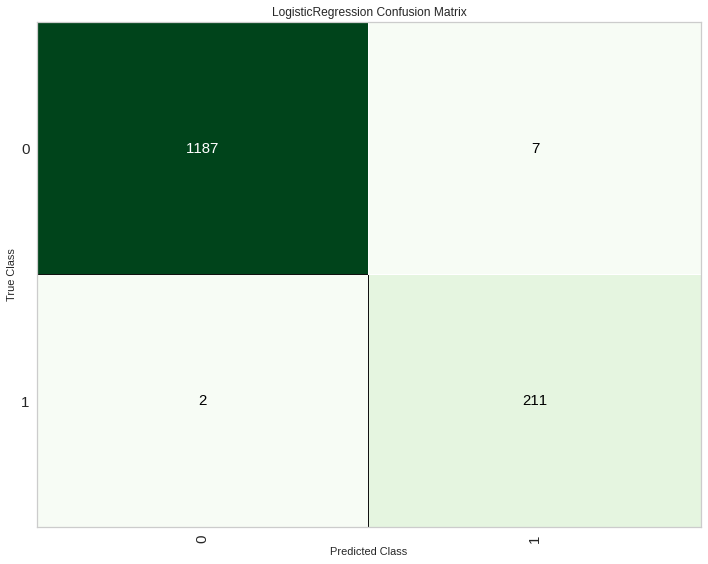

In [ ]:
#This confusion matrix shows the results on the (unseen) hold-out test set - with only 2 false negatives while predicting most asteroids as hazardous accurately.
rcParams['figure.figsize'] = 10,8
plot_model(final_model_lr, plot = 'confusion_matrix')

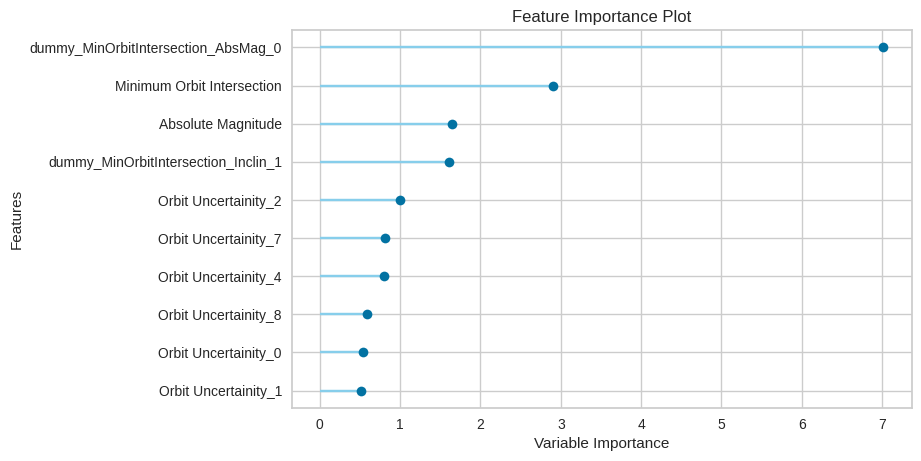

In [ ]:
#By analyzing the feature importance plot, I can assess if I should do some more feature engineering between the most important features. Thankfully, the dummy variables I created as among the most important.
plot_model(final_model_lr, plot = 'feature')

# Finalized Modelling

- Apply OHE to the categorical variables (Orbit Uncertainity).
- Apply standard z-score scaling to normalize the numeric features.
- Hyperparameter tuning, grid search, k-fold applied to the best model found via pycaret (logistic regression).

In [ ]:
df.head()

Neo Reference ID  ...  dummy_MinOrbitIntersection_Inclin
0           3703080  ...                                  0
1           3723955  ...                                  0
2           2446862  ...                                  0
3           3092506  ...                                  0
4           3514799  ...                                  0

[5 rows x 25 columns]

In [ ]:
dum_df

Neo Reference ID  ...  Orbit Uncertainity_9
0              3703080  ...                     0
1              3723955  ...                     0
2              2446862  ...                     0
3              3092506  ...                     0
4              3514799  ...                     0
...                ...  ...                   ...
4682           3759007  ...                     0
4683           3759295  ...                     0
4684           3759714  ...                     0
4685           3759720  ...                     0
4686           3772978  ...                     0

[4687 rows x 34 columns]

In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(df, columns=["Orbit Uncertainity"])
dum_df.head()

Neo Reference ID  ...  Orbit Uncertainity_9
0           3703080  ...                     0
1           3723955  ...                     0
2           2446862  ...                     0
3           3092506  ...                     0
4           3514799  ...                     0

[5 rows x 34 columns]

In [ ]:
#OHE was successful so I'll move forward with this dataset.
df = dum_df
df.head()

Neo Reference ID  ...  Orbit Uncertainity_9
0           3703080  ...                     0
1           3723955  ...                     0
2           2446862  ...                     0
3           3092506  ...                     0
4           3514799  ...                     0

[5 rows x 34 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Neo Reference ID                   4687 non-null   int64  
 1   Absolute Magnitude                 4687 non-null   float64
 2   Est Dia in KM(min)                 4687 non-null   float64
 3   Est Dia in KM(max)                 4687 non-null   float64
 4   Epoch Date Close Approach          4687 non-null   int64  
 5   Relative Velocity km per hr        4687 non-null   float64
 6   Miss Dist.(kilometers)             4687 non-null   float64
 7   Minimum Orbit Intersection         4687 non-null   float64
 8   Jupiter Tisserand Invariant        4687 non-null   float64
 9   Epoch Osculation                   4687 non-null   float64
 10  Eccentricity                       4687 non-null   float64
 11  Semi Major Axis                    4687 non-null   float

In [ ]:
#Adjusting data types
df['dummy_MinOrbitIntersection_AbsMag'] = df['dummy_MinOrbitIntersection_AbsMag'].astype('category')
df['dummy_MinOrbitIntersection_Inclin'] = df['dummy_MinOrbitIntersection_Inclin'].astype('category')
df['Orbit Uncertainity_0'] = df['Orbit Uncertainity_0'].astype('category')
df['Orbit Uncertainity_1'] = df['Orbit Uncertainity_1'].astype('category')
df['Orbit Uncertainity_2'] = df['Orbit Uncertainity_2'].astype('category')
df['Orbit Uncertainity_3'] = df['Orbit Uncertainity_3'].astype('category')
df['Orbit Uncertainity_4'] = df['Orbit Uncertainity_4'].astype('category')
df['Orbit Uncertainity_5'] = df['Orbit Uncertainity_5'].astype('category')
df['Orbit Uncertainity_6'] = df['Orbit Uncertainity_6'].astype('category')
df['Orbit Uncertainity_7'] = df['Orbit Uncertainity_7'].astype('category')
df['Orbit Uncertainity_8'] = df['Orbit Uncertainity_8'].astype('category')
df['Orbit Uncertainity_9'] = df['Orbit Uncertainity_9'].astype('category')

In [ ]:
#I want to apply the standard z-score scaling to the numeric values otherwise the predictability may be impacted negatively without scaling.
scaler = StandardScaler()
columns = ['Absolute Magnitude',	'Est Dia in KM(min)',	'Est Dia in KM(max)',	'Epoch Date Close Approach',	'Relative Velocity km per hr',	'Miss Dist.(kilometers)',	'Minimum Orbit Intersection',	'Jupiter Tisserand Invariant',	'Epoch Osculation',	'Eccentricity',	'Semi Major Axis',	'Inclination',	'Asc Node Longitude',	'Orbital Period',	'Perihelion Distance',	'Perihelion Arg',	'Aphelion Dist',	'Perihelion Time',	'Mean Anomaly',	'Mean Motion']

df[columns] = scaler.fit_transform(df[columns])

In [ ]:
df.head()

Neo Reference ID  ...  Orbit Uncertainity_9
0           3703080  ...                     0
1           3723955  ...                     0
2           2446862  ...                     0
3           3092506  ...                     0
4           3514799  ...                     0

[5 rows x 34 columns]

In [ ]:
#Here, I quickly drop the target variable and the ID feature before splitting the train/test and moving forward with modeling with sci-kit learn.
y_true = df['Hazardous']
x_df = df.drop(['Hazardous','Neo Reference ID'], axis=1)

In [ ]:
#This time, I'm using an 80% training dataset and a 20% training dataset.
x_train,y_train,x_test,y_test=train_test_split(x_df,y_true,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Grid Search Parameters for Logististic Regression
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'penalty': ['l2'],
 'C': [100, 10, 1.0, 0.1, 0.01]}

# Training config
kfold = StratifiedKFold(n_splits=7)
scoring = {'Recall': 'recall', 'Accuracy': 'accuracy'}
refit = 'Recall'

# Perform GridSearch
lr_model = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=kfold, scoring=scoring, 
                         refit=refit, n_jobs=-1, return_train_score=True, verbose=1)
lr_model.fit(x_train, x_test)

Fitting 7 folds for each of 15 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    8.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit='Recall', return_train_score=True,
             scoring={'Accuracy': 'accuracy', 'Recall

In [ ]:
#Review best parameters, score, and estimator
lr_model.best_params_
print('\n')
lr_model.best_score_
print('\n')
lr_model.best_estimator_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

0.9934127620575095

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Create the tuned logistic regression model
lr_tuned = LogisticRegression(C= 2.0,
                                  penalty= 'l2',
                                  solver= 'newton-cg')
lr_tuned.fit(x_train, x_test)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Assessing the results of the model.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score

pred_val = lr_tuned.predict(y_train)

print("Confusion matrix:")
print(confusion_matrix(y_test, pred_val))

print("\nAccuracy = {:.5f}".format(accuracy_score(y_test, pred_val)))

print("\nF1 Score = {:.5f}".format(f1_score(y_test, pred_val)))

print("\nRecall = {:.5f}".format(recall_score(y_test, pred_val)))

print("\nClassification Report:")
print(classification_report(y_test, pred_val))

Confusion matrix:
[[787   4]
 [  2 145]]

Accuracy = 0.99360

F1 Score = 0.97973

Recall = 0.98639

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       791
        True       0.97      0.99      0.98       147

    accuracy                           0.99       938
   macro avg       0.99      0.99      0.99       938
weighted avg       0.99      0.99      0.99       938



### Results
I recreated the best model that I identified with PyCaret by using Sci-kit learn (sklearn). The resulting recall was approximately 98.6% thereby netting a great score that minimized false negatives. This was nearly equivalent to the 99% recall that was netted in PyCaret with logistic regression.